In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_excel("hydrogen_test_classification.xlsx")
raw_data.head()

,TRUE VALUE,SIO2(WT%),TIO2(WT%),AL2O3(WT%),CR2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),NA2O(WT%),...,PR(PPB),ND(PPB),SM(PPB),EU(PPB),GD(PPB),DY(PPB),ER(PPB),YB(PPB),LU(PPB),TH(PPB)
0,1,49.4200,0.7771,0.5047,0.0196,23.2200,17.8500,6.6800,0.8421,0.2652,...,3722.193112,15286.752450,2496.972275,771.341005,1615.571766,1043.106268,679.293908,620.002530,99.000000,2117.083155
1,-1,55.4236,0.2302,7.9009,0.0768,3.1775,15.0067,13.6203,0.0780,3.5551,...,1404.899518,7334.225012,1581.714783,440.534631,1075.024781,456.772767,106.450006,56.000000,7.190000,18.012303
2,1,55.7368,0.2486,5.8661,0.1236,2.9318,16.6816,14.8219,0.0767,3.2461,...,2045.355178,9016.002637,2564.537120,1118.437460,2882.436657,4479.791591,2590.481678,2645.268490,275.616274,343.599927
3,1,54.8200,0.2900,3.4300,0.2200,5.9200,17.4100,14.1700,0.0001,3.1700,...,2574.159825,14995.256360,4145.128868,1432.173091,4015.452788,2864.960991,1020.780199,696.964682,82.247877,42.500000
4,-1,54.7000,0.1700,1.5400,0.0200,6.8800,19.1400,14.3900,0.0001,2.1800,...,1080.000000,3790.000000,458.000000,119.600000,260.000000,61.500000,8.470000,2.580000,0.620000,184.200000


In [4]:
# 分开特征值和标签值
X = raw_data.drop("TRUE VALUE", axis=1).copy()
y = raw_data["TRUE VALUE"]
y.unique()

array([ 1, -1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

# 分训练集、验证集和测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, Y_valid, X_label, Y_label = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(Y_valid.shape)
print(X_label.shape)
print(Y_label.shape)

(1508, 25)
(378, 25)
(1508,)
(378,)


In [7]:
#将数据进行转化成四个通道，方便使用卷积神经网络进行分类
def transform(X):
    X=X.values
    X=X.reshape(X.shape[0:1][0],5,5)
    X=np.expand_dims(X,-1)
    print("转化后的维度大小为：")
    print(X.shape)
    return X

In [8]:
#首先对X—train进行维度转换
X_train=transform(X_train)

转化后的维度大小为：
(1508, 5, 5, 1)


In [9]:
X_train.shape

(1508, 5, 5, 1)

In [12]:
Y_valid=transform(Y_valid)
Y_valid.shape

转化后的维度大小为：
(378, 5, 5, 1)


(378, 5, 5, 1)

In [13]:
Y_valid.shape

(378, 5, 5, 1)

In [14]:
#将label的标签值，转化为1和0
def only_one_and_zero(y):
    y=y.values#将pandas当中的dateframe对象转化为numpy-ndarray对象
    length=y.shape[0:1][0]
    i=0
    while i<length:
        if(y[i]==-1):
            y[i]=0
        i+=1
    print("当前的y为",y)
    print(type(y))
    return y

In [15]:
X_label=only_one_and_zero(X_label)

当前的y为 [1 1 0 ... 1 1 1]
<class 'numpy.ndarray'>


In [16]:
Y_label=only_one_and_zero(Y_label)

当前的y为 [1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 1 1 0]
<class 'numpy.ndarray'>


In [17]:
X_train

array([[[[5.18500000e+01],
         [2.10000000e-01],
         [6.60000000e-01],
         [1.00000000e-04],
         [1.32400000e+01]],

        [[1.99100000e+01],
         [9.84000000e+00],
         [1.07000000e+00],
         [2.40000000e+00],
         [6.78495693e+05]],

        [[2.10364530e+04],
         [9.28851555e+05],
         [4.48848007e+03],
         [1.10097285e+04],
         [2.93693804e+04]],

        [[4.21718539e+03],
         [1.94453540e+04],
         [5.00729644e+03],
         [1.79231127e+03],
         [5.08295796e+03]],

        [[4.46397271e+03],
         [2.31907776e+03],
         [2.71367184e+03],
         [5.56972768e+02],
         [4.37000000e+01]]],


       [[[5.19767310e+01],
         [9.68000000e-02],
         [3.94946528e+00],
         [1.00000000e-04],
         [2.51913950e+00]],

        [[2.10610211e+01],
         [1.71215933e+01],
         [8.85000000e-02],
         [1.78389439e+00],
         [5.25700000e+04]],

        [[1.99900000e+03],
         [3.

In [18]:
Y_label

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [19]:
X_train.shape

(1508, 5, 5, 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
#初步想法，将5*5的数据进行卷积操作，然后使用卷积神经网络进行图像识别
# input_shape 填特征的维度，将特征变为一维特征的形式
model = Sequential()
# model.add(Flatten(input_shape=[25]))、
model.add(tf.keras.layers.Conv2D(50,(2,2),input_shape=X_train.shape[1:],activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(100,(2,2),activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
#model.add(Dense(1024, activation="relu", input_shape=X_train.shape[1:]))
model.add(Dense(500, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(125, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 4, 50)          250       
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 50)          200       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 100)         20100     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               50500     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               1

In [22]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png',show_shapes=True)
#如果在本机安装pydot和pyfotprint这两个库的情况下，可以直接将神经网络进行可视化

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
)

In [24]:
#创建checkpoint,在模型训练是进行回调，这样可以让训练完之后的模型得以保存
import os
checkpoint_path = "training_1/cnn.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 创建一个保存模型权重的回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
#verbose=1，表示在模型训练的时候返回some imformation


In [25]:
history = model.fit(X_train,X_label, epochs=200,
                   validation_data=(Y_valid, Y_label),
                   callbacks=[cp_callback])

Train on 1508 samples, validate on 378 samples
Epoch 1/200
1440/1508 [===========================>..] - ETA: 0s - loss: 0.5942 - acc: 0.6736
Epoch 00001: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 1s 797us/sample - loss: 0.5889 - acc: 0.6771 - val_loss: 0.5336 - val_acc: 0.6481
Epoch 2/200
1408/1508 [===========================>..] - ETA: 0s - loss: 0.5032 - acc: 0.7280
Epoch 00002: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 204us/sample - loss: 0.4996 - acc: 0.7321 - val_loss: 0.4850 - val_acc: 0.7275
Epoch 3/200
1440/1508 [===========================>..] - ETA: 0s - loss: 0.4778 - acc: 0.7278
Epoch 00003: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 204us/sample - loss: 0.4772 - acc: 0.7261 - val_loss: 0.4684 - val_acc: 0.7910
Epoch 4/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.4519 - acc: 0.7484
Epoch 00004: saving model to training_1/cnn.ckpt


1184/1508 [======================>.......] - ETA: 0s - loss: 0.3523 - acc: 0.8269
Epoch 00031: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 181us/sample - loss: 0.3479 - acc: 0.8296 - val_loss: 0.3716 - val_acc: 0.8492
Epoch 32/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.3388 - acc: 0.8429
Epoch 00032: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 185us/sample - loss: 0.3515 - acc: 0.8362 - val_loss: 0.3543 - val_acc: 0.8386
Epoch 33/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.3435 - acc: 0.8495
Epoch 00033: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 182us/sample - loss: 0.3564 - acc: 0.8408 - val_loss: 0.3778 - val_acc: 0.8175
Epoch 34/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.3508 - acc: 0.8328
Epoch 00034: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 185us/sa

1472/1508 [============================>.] - ETA: 0s - loss: 0.2944 - acc: 0.8784
Epoch 00061: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 194us/sample - loss: 0.2940 - acc: 0.8786 - val_loss: 0.3093 - val_acc: 0.8757
Epoch 62/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.2920 - acc: 0.8750
Epoch 00062: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 207us/sample - loss: 0.2996 - acc: 0.8694 - val_loss: 0.3063 - val_acc: 0.8783
Epoch 63/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.3073 - acc: 0.8684
Epoch 00063: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 178us/sample - loss: 0.3048 - acc: 0.8694 - val_loss: 0.3053 - val_acc: 0.8704
Epoch 64/200
1248/1508 [=======================>......] - ETA: 0s - loss: 0.3053 - acc: 0.8662
Epoch 00064: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 181us/sa

1280/1508 [========================>.....] - ETA: 0s - loss: 0.3017 - acc: 0.8656
Epoch 00091: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 183us/sample - loss: 0.2981 - acc: 0.8647 - val_loss: 0.2925 - val_acc: 0.8783
Epoch 92/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.2808 - acc: 0.8758
Epoch 00092: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 180us/sample - loss: 0.2769 - acc: 0.8786 - val_loss: 0.2766 - val_acc: 0.9206
Epoch 93/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2651 - acc: 0.8947
Epoch 00093: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 175us/sample - loss: 0.2666 - acc: 0.8906 - val_loss: 0.2873 - val_acc: 0.8519
Epoch 94/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2911 - acc: 0.8783
Epoch 00094: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 183us/sa

1248/1508 [=======================>......] - ETA: 0s - loss: 0.2808 - acc: 0.8774
Epoch 00121: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 175us/sample - loss: 0.2706 - acc: 0.8853 - val_loss: 0.2729 - val_acc: 0.8995
Epoch 122/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2607 - acc: 0.8832
Epoch 00122: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 178us/sample - loss: 0.2574 - acc: 0.8879 - val_loss: 0.2487 - val_acc: 0.9153
Epoch 123/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.2735 - acc: 0.8826
Epoch 00123: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 177us/sample - loss: 0.2691 - acc: 0.8853 - val_loss: 0.2615 - val_acc: 0.8783
Epoch 124/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2378 - acc: 0.8956
Epoch 00124: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 178us

1152/1508 [=====================>........] - ETA: 0s - loss: 0.2323 - acc: 0.9019
Epoch 00151: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 185us/sample - loss: 0.2366 - acc: 0.8992 - val_loss: 0.2315 - val_acc: 0.9153
Epoch 152/200
1248/1508 [=======================>......] - ETA: 0s - loss: 0.2165 - acc: 0.9079
Epoch 00152: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 177us/sample - loss: 0.2274 - acc: 0.9012 - val_loss: 0.2295 - val_acc: 0.9259
Epoch 153/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.2397 - acc: 0.9054
Epoch 00153: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 176us/sample - loss: 0.2262 - acc: 0.9111 - val_loss: 0.2295 - val_acc: 0.9074
Epoch 154/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2382 - acc: 0.9030
Epoch 00154: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 179us

1280/1508 [========================>.....] - ETA: 0s - loss: 0.2490 - acc: 0.8977
Epoch 00181: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 174us/sample - loss: 0.2462 - acc: 0.8992 - val_loss: 0.2173 - val_acc: 0.9153
Epoch 182/200
1248/1508 [=======================>......] - ETA: 0s - loss: 0.2133 - acc: 0.9071
Epoch 00182: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 175us/sample - loss: 0.2216 - acc: 0.9025 - val_loss: 0.2223 - val_acc: 0.9259
Epoch 183/200
1216/1508 [=======================>......] - ETA: 0s - loss: 0.2368 - acc: 0.9021
Epoch 00183: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 178us/sample - loss: 0.2340 - acc: 0.9012 - val_loss: 0.2227 - val_acc: 0.9259
Epoch 184/200
1184/1508 [======================>.......] - ETA: 0s - loss: 0.2275 - acc: 0.9003
Epoch 00184: saving model to training_1/cnn.ckpt
1508/1508 [==============================] - 0s 180us

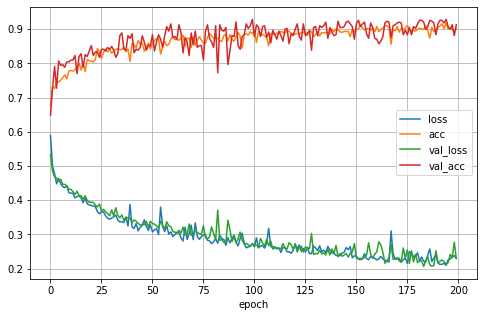

In [26]:
# 在一张图上画出loss和accuracy的
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("epoch")
plt.grid(True)
# plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

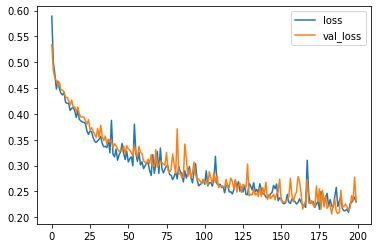

In [27]:
plt.plot(history.epoch,history.history.get('loss'),label="loss")
plt.plot(history.epoch,history.history.get('val_loss'),label="val_loss")
plt.legend()

In [28]:
#络的重要信息
history.params

{'batch_size': 32,
 'epochs': 200,
 'steps': 48,
 'samples': 1508,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

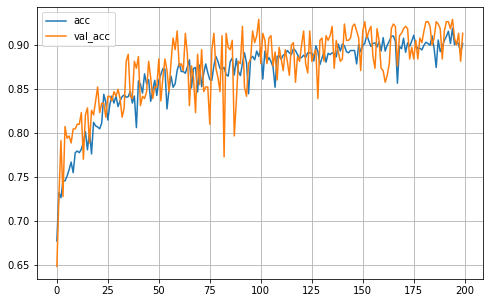

In [30]:
a = ["acc", "val_acc"]
plt.figure(figsize=(8, 5))
for i in a:
    plt.plot(history.history[i], label=i)
    plt.legend()
plt.grid(True)

In [31]:
model.evaluate(Y_valid, Y_label)

378/378 [==============================] - 0s 61us/sample - loss: 0.2300 - acc: 0.9127


[0.23003260404975326, 0.9126984]